In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42

%matplotlib inline

In [6]:
df=pd.read_csv('311_Service_Requests_from_2010_to_Present.csv',low_memory=False)

In [9]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,41318948,01/01/2019 12:00:00 AM,01/01/2019 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Mouse Sighting,3+ Family Apt. Building,11208,790 ELDERTS LANE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670554,-73.863105,"(40.67055409879978, -73.8631053928292)"
1,41318588,01/01/2019 12:00:00 AM,01/01/2019 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11222,131 MCGUINNESS BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.726966,-73.949511,"(40.726966300396555, -73.94951088547417)"
2,41318587,01/01/2019 12:00:00 AM,01/01/2019 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10456,1220 GRAND CONCOURSE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.834950,-73.917266,"(40.83495026019115, -73.91726640260559)"
3,41317127,01/01/2019 12:00:00 AM,01/01/2019 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,3+ Family Apt. Building,10463,3400 FORT INDEPENDENCE STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.880350,-73.899277,"(40.880349795123124, -73.89927699007562)"
4,41315535,01/01/2019 12:00:00 AM,01/01/2019 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10128,227 EAST 96 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.784732,-73.948221,"(40.784731646241326, -73.94822127280133)"


In [8]:
df.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                       object
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

In [11]:
df1 = df[['Created Date','Agency Name','Complaint Type','Descriptor','Incident Zip','City','Latitude','Longitude']]

In [25]:
df1.head(11)

,Created Date,Agency Name,Complaint Type,Descriptor,Incident Zip,City,Latitude,Longitude
0,01/01/2019 12:00:00 AM,Department of Health and Mental Hygiene,Rodent,Mouse Sighting,11208,BROOKLYN,40.670554,-73.863105
1,01/01/2019 12:00:00 AM,Department of Health and Mental Hygiene,Rodent,Rat Sighting,11222,BROOKLYN,40.726966,-73.949511
2,01/01/2019 12:00:00 AM,Department of Health and Mental Hygiene,Rodent,Rat Sighting,10456,BRONX,40.834950,-73.917266
3,01/01/2019 12:00:00 AM,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,10463,BRONX,40.880350,-73.899277
4,01/01/2019 12:00:00 AM,Department of Health and Mental Hygiene,Rodent,Rat Sighting,10128,NEW YORK,40.784732,-73.948221
5,01/01/2019 12:00:00 AM,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,11208,BROOKLYN,40.670554,-73.863105
6,01/01/2019 12:00:00 AM,Department of Health and Mental Hygiene,Rodent,Rat Sighting,10459,BRONX,40.828469,-73.895453
7,01/01/2019 12:00:00 AM,Department of Health and Mental Hygiene,Rodent,Rat Sighting,10002,NEW YORK,40.712949,-73.995231
8,01/01/2019 12:00:00 AM,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,11203,BROOKLYN,40.660713,-73.937566
9,01/01/2019 12:00:00 AM,Department of Health and Mental Hygiene,Rodent,Rat Sighting,10002,NEW YORK,40.712949,-73.995231


In [14]:
df1['Complaint Type'].unique()

array(['Rodent', 'Unsanitary Pigeon Condition',
       'Unsanitary Animal Pvt Property', 'Food Poisoning', 'DOOR/WINDOW',
       'Noise - Residential', 'For Hire Vehicle Report',
       'Blocked Driveway', 'Street Condition', 'Noise - Commercial',
       'Hazardous Materials', 'Illegal Parking',
       'Traffic Signal Condition', 'Request Large Bulky Item Collection',
       'Sewer', 'Noise - Street/Sidewalk', 'Taxi Complaint', 'Noise',
       'HEAT/HOT WATER', 'UNSANITARY CONDITION', 'Building/Use',
       'ELECTRIC', 'Illegal Fireworks', 'WATER LEAK', 'Curb Condition',
       'Derelict Vehicle', 'Animal Abuse', 'Noise - Vehicle', 'SAFETY',
       'Sanitation Condition', 'Air Quality', 'Food Establishment',
       'New Tree Request', 'Street Light Condition',
       'Benefit Card Replacement',
       'DCA / DOH New License Application Request', 'PAINT/PLASTER',
       'DPR Internal', 'Homeless Person Assistance',
       'HPD Literature Request', 'ELEVATOR',
       'Non-Emergency Polic

In [28]:
df1['Complaint Type'].str.contains('Misc')

0          False
1          False
2          False
3          False
4          False
5          False
6          False
7          False
8          False
9          False
10         False
11         False
12         False
13         False
14         False
15         False
16         False
17         False
18         False
19         False
20         False
21         False
22         False
23         False
24         False
25         False
26         False
27         False
28         False
29         False
           ...  
1381264    False
1381265    False
1381266    False
1381267    False
1381268    False
1381269    False
1381270    False
1381271    False
1381272    False
1381273    False
1381274    False
1381275    False
1381276    False
1381277    False
1381278    False
1381279    False
1381280    False
1381281    False
1381282    False
1381283    False
1381284    False
1381285    False
1381286    False
1381287    False
1381288    False
1381289    False
1381290    False
1381291    Fal

In [40]:
df1 = df1[~df1['Complaint Type'].isin([  "Misc. Comments'||(select ex...", '(select extractvalue(xmltyp...',
       'Misc. Comments;declare @q v...', "Misc. Comments';declare @q ...",
       'Misc. Comments);declare @q ...', 'Misc. Comments,(select*from...',
       "Misc. Comments'+(select*fro...", "Misc. Comments'+(select loa...",
       "Misc. Comments'", "Misc. Comments');declare @q...",
       "Misc. Comments'(select*from...",
       "(select load_file('\\\\\\\\615h...",
       "Misc. Comments' waitfor del...", "Misc. Comments52038737' or ...",
       "Misc. Comments' and '7835'=...", "Misc. Comments47876391' or ...",
       "Misc. Comments',0)waitfor d...", "Misc. Comments' and (select...",
       "Misc. Comments88909845' or ...", "Misc. Comments69075347' or ...",
       'Misc. Comments"', 'Misc. Commentseowljujfh8',
       "Misc. Comments')waitfor del...", "Misc. Comments' and 6049=60...",
       "Misc. Comments' and 7702=77...", 'qfix4${695*589}lixaf',
       "Misc. Comments' and '1618'=...", 'Misc. Commentso0w3r%>xb6...',
       'yw97y0gi2s', "Misc. Comments'+eval(compil...",
       "Misc. Comments%}dt2pq'/&quo...", "Misc. Comments'+sleep(20.to...",
       "Misc. Comments}}t2v95'/&quo...", 'hcvn1{{687*375}}gji51',
       'http://g7orz5h9iu2sh6z332rj...', 'Misc. Comments|nslookup -q=...',
       '266dyrgvhg1egsyp2oq57axbm2s...', "eval(compile('for x in rang...",
       'Misc. Comments{${sleep(20)}}', "Misc. Comments'.sleep(20).'",
       'nslookup -q=cname nneyfcxgy...', 'Misc. Comments\'"`0&amp...',
       'Misc. Comments"|echo 2...', 'Misc. Comments&nslookup...',
       'Misc. Comments&echo xjd...', 'Misc. Comments"|ping -...',
       'Misc. Comments&ping -n ...', "Misc. Comments'|echo y9v6fc...",
       'Misc. Comments|ping -c 21 1...', 'Misc. Comments|ping -n 21 1...',
       'Misc. Comments|echo 3p7wexz...',
       '.../.\\.../.\\.../.\\.../.\\......', 'file:///c:/windows/win.ini',
       "Misc. Comments'|ping -c 21 ...", 'c:\\windows\\win.ini',
       '..\\..\\..\\..\\..\\..\\..\\..\\..\\...',
       '../../../../../../../../../...',
       '...\\.\\...\\.\\...\\.\\...\\.\\......',
       '...\\./...\\./...\\./...\\./......', '\\windows\\win.ini',
       '%2e%2e%5c%2e%2e%5c%2e%2e%5c...',
       'Misc. Comments..\\..\\..\\..\\....',
       'Misc. Comments../../../../....',
       'c:\\windows\\win.ini Misc. Co...',
       '%2e%2e%2f%2e%2e%2f%2e%2e%2f...', '..././..././..././..././......',
       'file:///etc/passwd', '/etc/passwd', '/./validate_form.php',
       './validate_form.php', '.../Misc. Comments',
       '<odb xmlns:xi="http...', 'Misc. Comments]]>><',
       '<vlv xmlns="http://...', 'idexf3mrb7)(!(objectClass=*)',
       'g0oii1s4s5)(objectClass=*', '*)(objectClass=*',
       '*)(!(objectClass=*)', 'Misc. Comments>  BCC:bl0...',
       '"-->\'-->`-->&...', 'Misc. Comments  BCC:a5glxzf...',
       '() { :;}; /bin/sleep 11', '`sleep 11`',
       "Misc. Comments'+(function()...", '%{4761*8506}', '$(sleep 11)',
       '() { _; } >_', 'a\'a\\\'b"c>?>%}}%%...', '() { :;}; /bin/sleep 0',
       '${3804*3137}', '@(9313*3464)', "kawn''lcgv", '1430*4963',
       "{!xmlparser v='<!DOCTYPE...", 'bcd9<!--esi-->1ggp&lt...',
       '../../../../WEB-INF/web.xml', '%{(#dm=@ognl.OgnlContext@DE...',
       '../../../WEB-INF/web.xml', '../WEB-INF/web.xml',
       '.../...//.../...//.../...//...', '%c0%ae/%c0%ae/%c0%ae/WEB-IN...',
       '../WEB-INF/web.xml;x=', '%c0%ae/WEB-INF/web.xml',
       '.../....///.../....///.../....', '%2fetc%2fpasswd',
       '../../WEB-INF/web.xml', '../../WEB-INF/web.xml;x=',
       '%E5%98%8A%E5%98%8DX-Injecti...', '%c0%ae/%c0%ae/%c0%ae/%c0%ae...',
       '%c0%ae/%c0%ae/WEB-INF/web.xml', '../../../WEB-INF/web.xml;x='])]

,Created Date,Agency Name,Complaint Type,Descriptor,Incident Zip,City,Latitude,Longitude
0,01/01/2019 12:00:00 AM,Department of Health and Mental Hygiene,Rodent,Mouse Sighting,11208,BROOKLYN,40.670554,-73.863105
1,01/01/2019 12:00:00 AM,Department of Health and Mental Hygiene,Rodent,Rat Sighting,11222,BROOKLYN,40.726966,-73.949511
2,01/01/2019 12:00:00 AM,Department of Health and Mental Hygiene,Rodent,Rat Sighting,10456,BRONX,40.834950,-73.917266
3,01/01/2019 12:00:00 AM,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,10463,BRONX,40.880350,-73.899277
4,01/01/2019 12:00:00 AM,Department of Health and Mental Hygiene,Rodent,Rat Sighting,10128,NEW YORK,40.784732,-73.948221
5,01/01/2019 12:00:00 AM,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,11208,BROOKLYN,40.670554,-73.863105
6,01/01/2019 12:00:00 AM,Department of Health and Mental Hygiene,Rodent,Rat Sighting,10459,BRONX,40.828469,-73.895453
7,01/01/2019 12:00:00 AM,Department of Health and Mental Hygiene,Rodent,Rat Sighting,10002,NEW YORK,40.712949,-73.995231
8,01/01/2019 12:00:00 AM,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,11203,BROOKLYN,40.660713,-73.937566
9,01/01/2019 12:00:00 AM,Department of Health and Mental Hygiene,Rodent,Rat Sighting,10002,NEW YORK,40.712949,-73.995231


In [50]:
df1['Complaint Type'].value_counts()

HEAT/HOT WATER                         122640
Noise - Residential                    116575
Request Large Bulky Item Collection     99538
Illegal Parking                         91960
Blocked Driveway                        67031
Street Condition                        51936
Noise - Street/Sidewalk                 41220
UNSANITARY CONDITION                    37206
Street Light Condition                  35849
Noise                                   32665
Water System                            29023
PAINT/PLASTER                           27630
General Construction/Plumbing           25629
PLUMBING                                25507
Noise - Commercial                      22697
Noise - Vehicle                         21896
Missed Collection (All Materials)       21151
Sanitation Condition                    20627
Traffic Signal Condition                20357
Electronics Waste                       18811
Derelict Vehicles                       18336
DOOR/WINDOW                       

In [47]:
df1['freq'] = df1.groupby('Complaint Type')['Complaint Type'].transform('count')

In [51]:
df1.to_csv('cleaned.csv',index=False)

In [53]:
df1['City'].value_counts()

BROOKLYN               432176
NEW YORK               250545
BRONX                  239366
STATEN ISLAND           77561
Jamaica                 18014
JAMAICA                 16628
Flushing                13548
Astoria                 12097
ASTORIA                 11579
RIDGEWOOD               10949
Ridgewood               10906
FLUSHING                10659
FRESH MEADOWS            8799
Elmhurst                 6918
Far Rockaway             6144
Ozone Park               5793
CORONA                   5641
OZONE PARK               5551
LONG ISLAND CITY         5461
WOODSIDE                 5439
SOUTH RICHMOND HILL      5292
Queens Village           5203
Woodside                 4988
EAST ELMHURST            4978
Corona                   4724
Fresh Meadows            4624
ELMHURST                 4298
South Ozone Park         4277
South Richmond Hill      4244
Forest Hills             4192
                        ...  
CHICAGO                     1
WOODBERRY                   1
DOVER     

In [54]:
df1['Incident Zip'].value_counts()

11226         23195
11385         21891
10467         19353
11221         17168
11207         16778
10457         16135
10453         16080
11208         15765
10468         15345
10458         15339
10452         15202
10456         14634
11206         14357
11233         14339
10031         13572
11225         13545
11230         13333
11234         13331
11203         13292
11215         13011
11209         12958
11212         12873
10314         12813
11216         12763
11220         12644
11238         12339
11237         12104
11211         12095
11213         12038
11223         12005
              ...  
11352             1
601488479         1
07079             1
10523             1
14068             1
78245             1
07203             1
10702             1
00881             1
07208             1
94267             1
W1                1
11111             1
11779             1
46219             1
07073             1
19082             1
07029             1
40512-4444        1


In [55]:
df1['Created Month']=df1['Created Date'].str.extract(r'(\d\d)/\d\d/\d\d\d\d')

In [58]:
df1['Created Month'].value_counts()

06    246488
05    246052
01    240920
04    222670
03    222606
02    202435
07         2
Name: Created Month, dtype: int64

In [61]:
Jan=pd.DataFrame(df1.loc[df1['Created Month'] == '01'])

In [62]:
Jan.head()

,Created Date,Agency Name,Complaint Type,Descriptor,Incident Zip,City,Latitude,Longitude,freq,Created Month
0,01/01/2019 12:00:00 AM,Department of Health and Mental Hygiene,Rodent,Mouse Sighting,11208,BROOKLYN,40.670554,-73.863105,15844,01
1,01/01/2019 12:00:00 AM,Department of Health and Mental Hygiene,Rodent,Rat Sighting,11222,BROOKLYN,40.726966,-73.949511,15844,01
2,01/01/2019 12:00:00 AM,Department of Health and Mental Hygiene,Rodent,Rat Sighting,10456,BRONX,40.834950,-73.917266,15844,01
3,01/01/2019 12:00:00 AM,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,10463,BRONX,40.880350,-73.899277,15844,01
4,01/01/2019 12:00:00 AM,Department of Health and Mental Hygiene,Rodent,Rat Sighting,10128,NEW YORK,40.784732,-73.948221,15844,01


In [63]:
del Jan['freq']

In [64]:
Jan.head()

,Created Date,Agency Name,Complaint Type,Descriptor,Incident Zip,City,Latitude,Longitude,Created Month
0,01/01/2019 12:00:00 AM,Department of Health and Mental Hygiene,Rodent,Mouse Sighting,11208,BROOKLYN,40.670554,-73.863105,01
1,01/01/2019 12:00:00 AM,Department of Health and Mental Hygiene,Rodent,Rat Sighting,11222,BROOKLYN,40.726966,-73.949511,01
2,01/01/2019 12:00:00 AM,Department of Health and Mental Hygiene,Rodent,Rat Sighting,10456,BRONX,40.834950,-73.917266,01
3,01/01/2019 12:00:00 AM,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,10463,BRONX,40.880350,-73.899277,01
4,01/01/2019 12:00:00 AM,Department of Health and Mental Hygiene,Rodent,Rat Sighting,10128,NEW YORK,40.784732,-73.948221,01


In [66]:
Jan.to_csv("Jan.csv",index=False)

In [67]:
June=pd.DataFrame(df1.loc[df1['Created Month'] == '06'])

In [68]:
del June['freq']

In [69]:
June.head()

,Created Date,Agency Name,Complaint Type,Descriptor,Incident Zip,City,Latitude,Longitude,Created Month
1134683,06/01/2019 12:00:00 AM,Department of Health and Mental Hygiene,Standing Water,Puddle on Sidewalk,10305,STATEN ISLAND,40.583820,-74.095174,06
1134684,06/01/2019 12:00:00 AM,Department of Health and Mental Hygiene,Standing Water,Puddle in Ground,10303,STATEN ISLAND,40.627695,-74.149365,06
1134685,06/01/2019 12:00:00 AM,Department of Health and Mental Hygiene,Standing Water,Other - Explain Below,10306,STATEN ISLAND,40.577382,-74.116941,06
1134686,06/01/2019 12:00:00 AM,Department of Health and Mental Hygiene,Standing Water,Other - Explain Below,10012,NEW YORK,40.727922,-74.000112,06
1134687,06/01/2019 12:00:00 AM,Department of Health and Mental Hygiene,Standing Water,Swimming Pool Cover,11238,BROOKLYN,40.676097,-73.961353,06


In [70]:
June.to_csv("June.csv",index=False)

In [75]:
June['Complaint Type'].value_counts().head(10)

Noise - Residential                    24453
Request Large Bulky Item Collection    18451
Illegal Parking                        18168
Noise - Street/Sidewalk                16720
Blocked Driveway                       11665
Street Condition                        8282
Noise - Vehicle                         6288
Street Light Condition                  6012
UNSANITARY CONDITION                    6001
Noise                                   5493
Name: Complaint Type, dtype: int64

In [76]:
Jan['Complaint Type'].value_counts().head(10)

HEAT/HOT WATER                         47095
Noise - Residential                    16176
Request Large Bulky Item Collection    14628
Illegal Parking                        13189
Blocked Driveway                       11393
Street Condition                        7419
UNSANITARY CONDITION                    7101
Water System                            6313
Street Light Condition                  6222
PLUMBING                                5645
Name: Complaint Type, dtype: int64

In [77]:
df1['Complaint Type'].value_counts().head(10)

HEAT/HOT WATER                         122640
Noise - Residential                    116575
Request Large Bulky Item Collection     99538
Illegal Parking                         91960
Blocked Driveway                        67031
Street Condition                        51936
Noise - Street/Sidewalk                 41220
UNSANITARY CONDITION                    37206
Street Light Condition                  35849
Noise                                   32665
Name: Complaint Type, dtype: int64

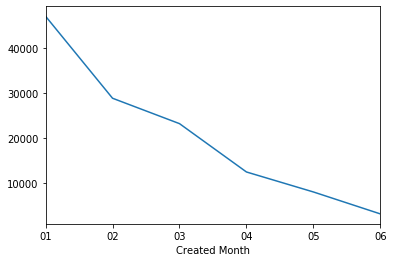

In [85]:
df1.loc[df1['Complaint Type'] == 'HEAT/HOT WATER'].groupby('Created Month')['Created Month'].count().plot()

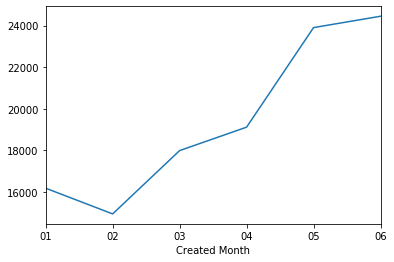

In [86]:
df1.loc[df1['Complaint Type'] == 'Noise - Residential'].groupby('Created Month')['Created Month'].count().plot()

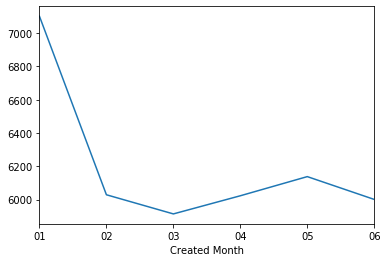

In [87]:
df1.loc[df1['Complaint Type'] == 'UNSANITARY CONDITION'].groupby('Created Month')['Created Month'].count().plot()

In [89]:
df1.loc[df1['Complaint Type'] == 'UNSANITARY CONDITION']['Descriptor'].value_counts()

PESTS                        17079
MOLD                         12930
GARBAGE/RECYCLING STORAGE     6220
SEWAGE                         977
Name: Descriptor, dtype: int64

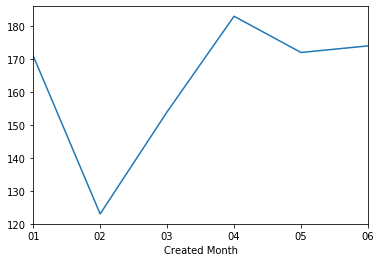

In [104]:
df1.loc[df1['Descriptor']== 'SEWAGE'].groupby('Created Month')['Created Month'].count().plot()

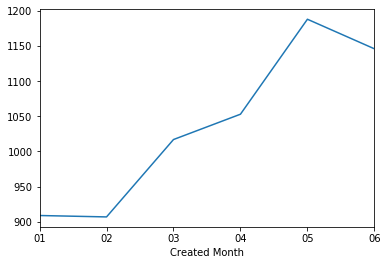

In [101]:
df1.loc[df1['Descriptor']== 'GARBAGE/RECYCLING STORAGE'].groupby('Created Month')['Created Month'].count().plot()